# Portfolio 1

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta,date
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 12)
import warnings; warnings.simplefilter('ignore')
import numpy as np

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [3]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
#print (strava.index.tzinfo)
#if strava.index.tzinfo is None:      
#    strava.index = strava.index.tz_localize('UTC')
strava.index = strava.index.tz_convert('UTC')
'''if there is no info about the timezone then it will localise it. 
If data is Timezone aware then re-localising with just result in an error  saying that:
TypeError: Already tz-aware, use tz_convert to convert.'''
##strava.index = strava.index.tz_localize('UTC')
#print(strava.index)
strava.head()


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [4]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
#print (cheetah.index.tzinfo) #here the data set had no info about time zone hence localising did not result in an error
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')

cheetah.head()


,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [5]:

joined = cheetah.join(strava,how='inner')
print ("After joining th etwo datasets, new dimensions are:",joined.shape)




After joining th etwo datasets, new dimensions are: (243, 372)


## <font color = 'brown'>1. Remove rides with no measured power (where device_watts is False)</font>

In [6]:

joined = joined[joined.device_watts!=False]
print("New dimensions of dataset:",joined.shape)



New dimensions of dataset: (209, 372)


### <font color='brown'>Cleaning the dataset</font>
#### <font color='blue'>Cleaning data against 'average_heartrate' and 'Average Heart Rate' columns</font>

In [7]:
#Checking all entries where Average Heart Rate or average_heartrate is not valid i.e. of no use to us for analysis

print("Number of entries where 'average_heartrate' is null or 0:",joined.loc[(joined['average_heartrate'].isnull()) | (joined['average_heartrate']==0)].shape)  #29 entries
print("Number of entries where 'Average Heart Rate' is null or 0:",joined.loc[(joined['Average Heart Rate']==0) | (joined['Average Heart Rate'].isnull()) ].shape) #29 entries
print('\n\n')
#joined[['average_heartrate','Average Heart Rate']][joined.average_heartrate.isnull()] 
#return 29 entries that have value as null.

#joined[['average_heartrate','Average Heart Rate']][joined.average_heartrate==0] 
#nothing is returned, it means all invalid values of average_heartrate are due to "null" values

print("Displaying all rows where 'average_heartrate' is null:")
print(joined[['average_heartrate','Average Heart Rate']][joined.average_heartrate.isnull()])
print('\n\n')
print("Number of rows where average_heartrate is null:",joined[['average_heartrate','Average Heart Rate']][joined.average_heartrate.isnull()].shape)

#I used this to match if invalid values for "average_heartrate" have valid values in "Average Heart Rate" 
#So we can use them to populate valid values in our dataset. 
#but is shows both columns have invalid values at the same places, so we can delete/drop these rows.


print(joined[['average_heartrate','Average Heart Rate']][joined.average_heartrate.isnull()].shape)

#Now we can drop these rows so that the dataset is a little clean.
joined = joined.dropna(axis=0, subset=['average_heartrate'])

#Lets check if the invalid rows have been removed
print('\n\nAfter dropping:')
print("Number of entries where 'average_heartrate' is null or 0:",joined.loc[(joined['average_heartrate'].isnull()) | (joined['average_heartrate']==0)].shape)  #
print("Number of entries where 'Average Heart Rate' is null or 0:",joined.loc[(joined['Average Heart Rate']==0) | (joined['Average Heart Rate'].isnull()) ].shape) #


Number of entries where 'average_heartrate' is null or 0: (22, 372)
Number of entries where 'Average Heart Rate' is null or 0: (22, 372)



Displaying all rows where 'average_heartrate' is null:
                           average_heartrate  Average Heart Rate
2018-02-15 07:18:46+00:00                NaN                 0.0
2018-02-22 09:43:31+00:00                NaN                 0.0
2018-03-01 07:07:22+00:00                NaN                 0.0
2018-04-05 08:12:13+00:00                NaN                 0.0
2018-04-26 22:26:44+00:00                NaN                 0.0
2018-04-27 08:20:35+00:00                NaN                 0.0
2018-05-19 20:01:48+00:00                NaN                 0.0
2018-05-26 21:02:16+00:00                NaN                 0.0
2018-08-03 20:17:56+00:00                NaN                 0.0
2018-11-23 19:19:24+00:00                NaN                 0.0
2019-01-16 21:41:01+00:00                NaN                 0.0
2019-01-17 05:39:44+00:00

#### <font color='blue'>Doing the same data cleaning for 'elapsed_time' and 'Duration'</font>

In [8]:
print("Number of entries where the value of 'Duration' is invalid:",joined.loc[(joined['Duration'].isnull()) | (joined['Duration']==0)].shape[0])
print("Number of entries where the value of 'elapsed_time' is invalid:",joined.loc[(joined['elapsed_time'].isnull()) | (joined['elapsed_time']==0)].shape[0])

#Nothing to clean here

Number of entries where the value of 'Duration' is invalid: 0
Number of entries where the value of 'elapsed_time' is invalid: 0


#### <font color='blue'>Doing the same data cleaning for 'Time Moving' and 'moving_time'</font>

In [9]:
print("Number of entries where the value of 'Time Moving' is invalid:",joined.loc[(joined['Time Moving'].isnull()) | (joined['Duration']==0)].shape[0])
print("Number of entries where the value of 'moving_time' is invalid:",joined.loc[(joined['moving_time'].isnull()) | (joined['elapsed_time']==0)].shape[0])

#Nothing to clean here

Number of entries where the value of 'Time Moving' is invalid: 0
Number of entries where the value of 'moving_time' is invalid: 0


#### <font color='blue'>Doing the same data cleaning for 'Average Power' and 'average_watts' </font>

In [10]:
print("Number of entries where the value of 'Average Power' is invalid:",joined.loc[(joined['Time Moving'].isnull()) | (joined['Duration']==0)].shape[0])
print("Number of entries where the value of 'average_watts' is invalid:",joined.loc[(joined['moving_time'].isnull()) | (joined['elapsed_time']==0)].shape[0])
#Nothing to clean here

Number of entries where the value of 'Average Power' is invalid: 0
Number of entries where the value of 'average_watts' is invalid: 0


In [11]:
joined['elevation_gain'] = joined.elevation_gain.str.extract(r'(\d+)', expand=True).astype(int)
#This will give error, if run the second time, 
#because digits have already been extracted and the data type will no longer be string

### <font color='brown'>2. Looking at the distributions of key variables </font>
<font color='brown'>distance, moving_time, Average Speed, Average Heart Rate, Average Power, NP, TSS, elevation_gain</font>

Text(0.5, 0.98, 'Distribution of key variables')

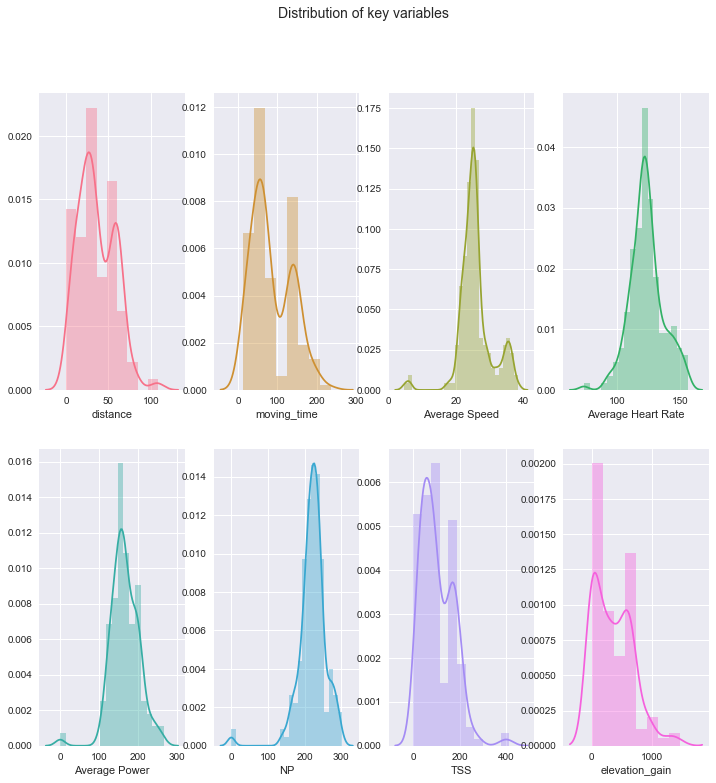

In [21]:
#Distributions for key variables like - 
#'distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain'

f, axes = plt.subplots(2, 4, figsize=(12, 12), sharex=False,sharey = False)

a = sns.color_palette("husl", 8)

a1 = [['distance','moving_time','Average Speed','Average Heart Rate'],['Average Power','NP','TSS','elevation_gain']]
for i in range (0,2):
    for j in range(0,4):
        sns.distplot(joined[a1[i][j]],ax=axes[i,j],color=a[(i*4)+j])
f.suptitle("Distribution of key variables",fontsize=14)

### <font color = 'brown'>3. Relationships between the key variables:</font>  
<font color = 'blue'>distance, moving_time, Average Speed, Average Heart Rate, AveragePower, NP, TSS, elevation_gain</font>

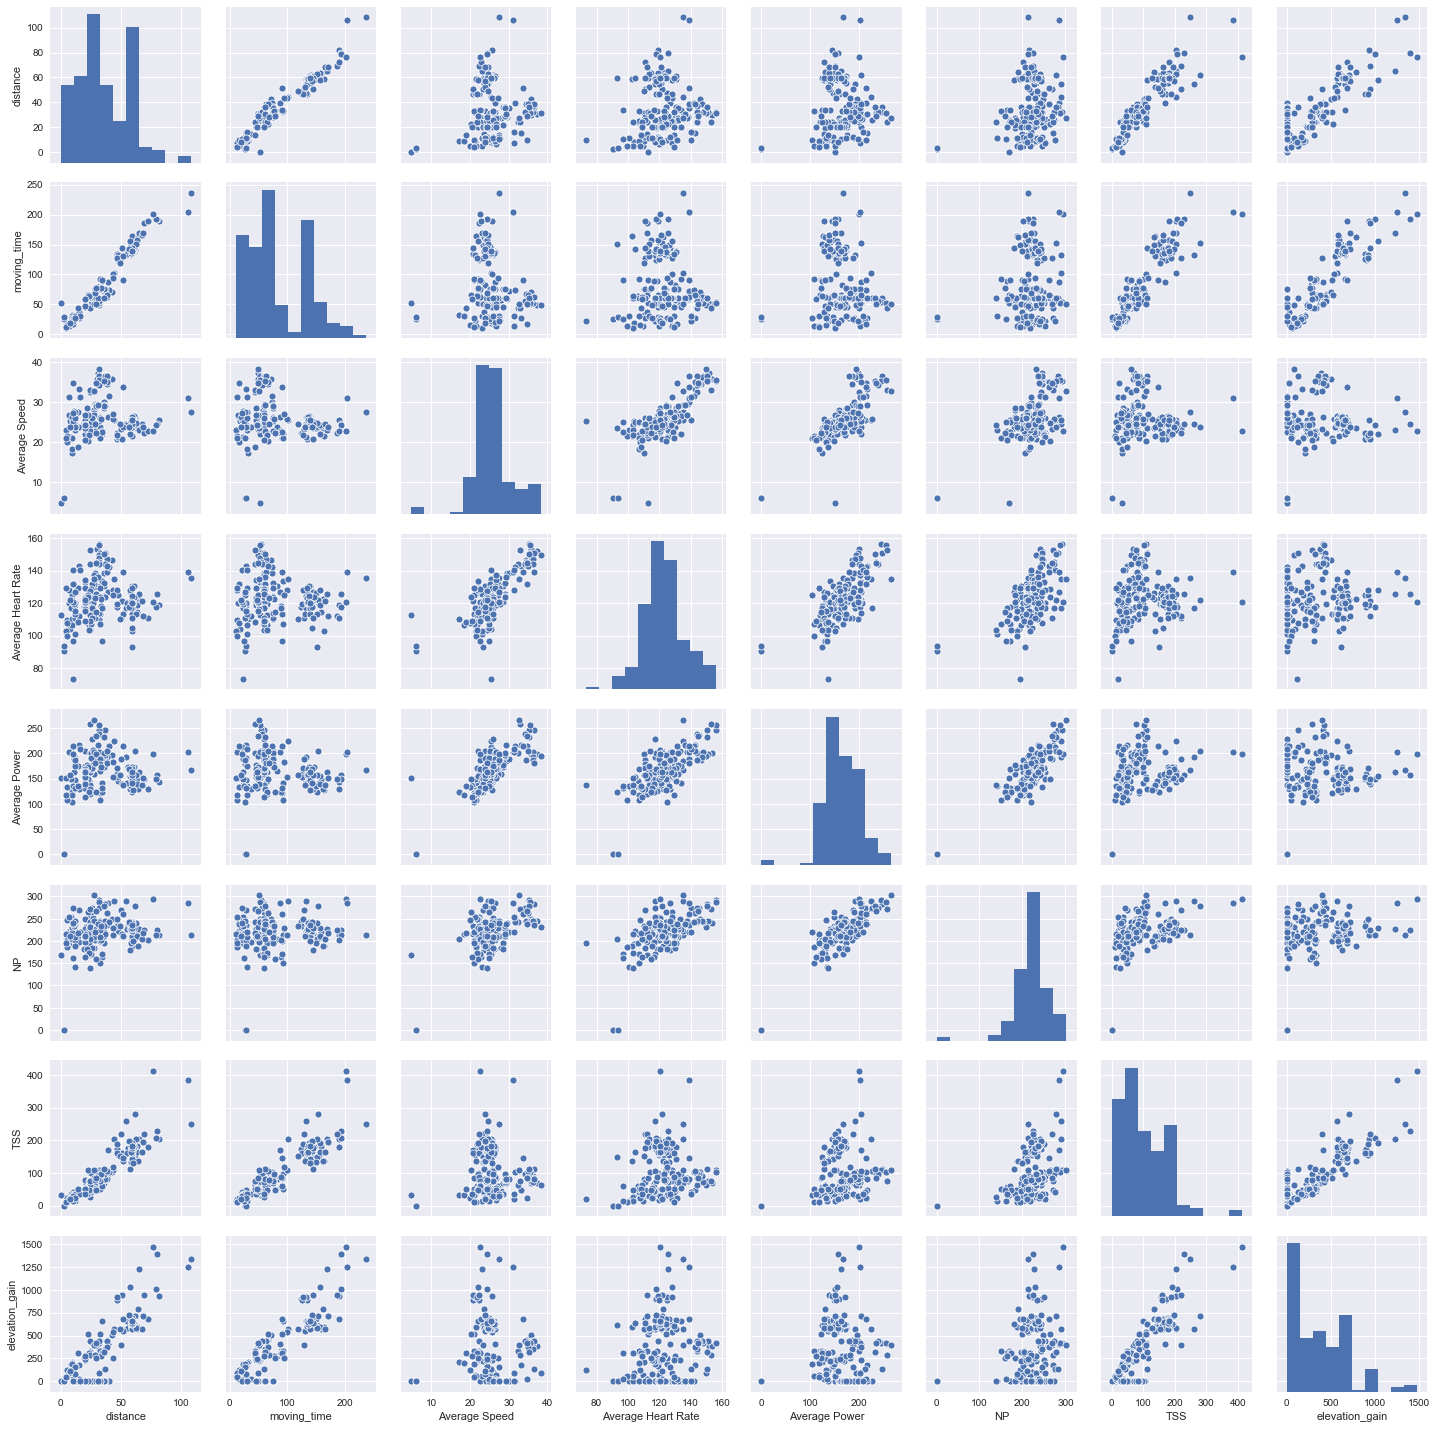

In [22]:
temp1 = joined[['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain']]
g = sns.pairplot(temp1)

In [23]:
temp1.corr()

,distance,moving_time,Average Speed,Average Heart Rate,Average Power,NP,TSS,elevation_gain
distance,1.000000,0.970734,0.096744,0.114592,0.033901,0.242425,0.917218,0.840445
moving_time,0.970734,1.000000,-0.117683,-0.049519,-0.115148,0.130395,0.906323,0.855625
Average Speed,0.096744,-0.117683,1.000000,0.746759,0.759923,0.592946,0.030411,-0.044438
Average Heart Rate,0.114592,-0.049519,0.746759,1.000000,0.695014,0.591775,0.112690,0.073179
Average Power,0.033901,-0.115148,0.759923,0.695014,1.000000,0.813538,0.143987,-0.083007
NP,0.242425,0.130395,0.592946,0.591775,0.813538,1.000000,0.423044,0.249476
TSS,0.917218,0.906323,0.030411,0.112690,0.143987,0.423044,1.000000,0.848705
elevation_gain,0.840445,0.855625,-0.044438,0.073179,-0.083007,0.249476,0.848705,1.000000


### <font color=brown>Observations(using the seaborn pairplot as well as the co-relation funcion):</font>  
* <font color=teal>'**distance**', '**moving_time**', '**TSS**' and '**elevation_gain**' are all prorportional to each other </font>
* <font color=teal>'**Average Speed**','**Average Heart Rate**' and '**Average Power**' are all proportional to each other</font>  
* <font color=teal>'**Average Power**' and '**NP**' are proportional to each other</font>

### <font color=brown>4. Explore the difference between the three categories: Race, Workout and Ride</font>

### <font color = 'brown'>Performing plots for different categories - Race, Workout, Ride</font>
Comparing all the key variables with each other on the basis of workout_type categories.

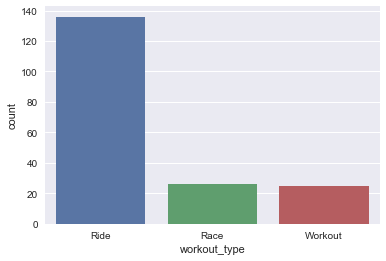

In [24]:
sns.countplot(x='workout_type',data=joined)
#This shows that the user goes for a Ride more often

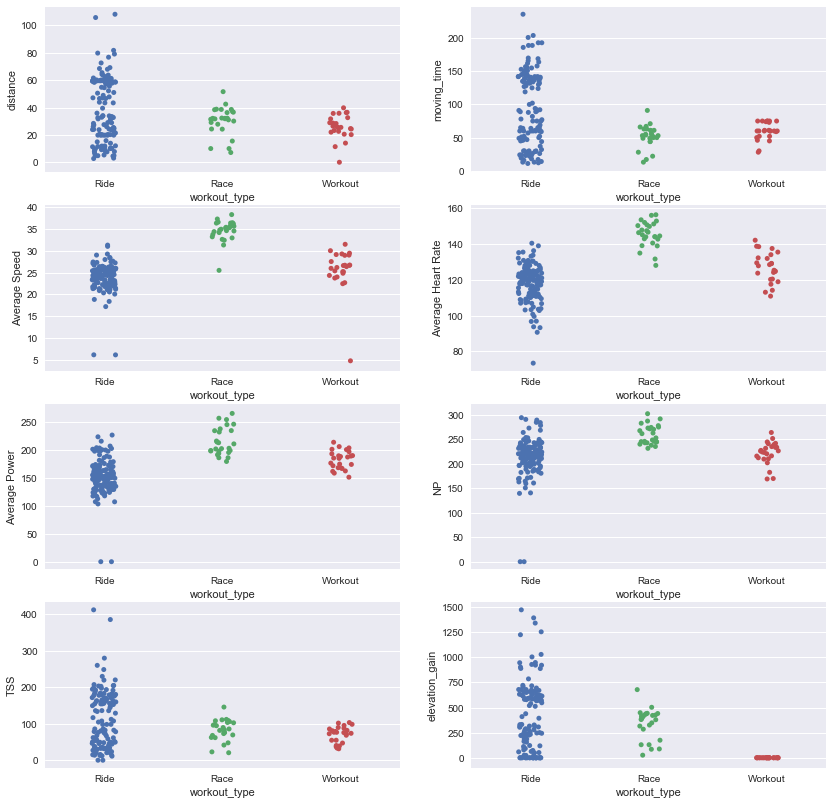

In [25]:
def analyse():
    a2 = ['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain']
    #a2.remove()
    #x = len(a)
    
    f, axes = plt.subplots(4,2, figsize=(14, 14), sharex=False)
    for i in range (0,4):
        for j in range(0,2):
            #if (i == 3) and (j==1):
                #axes[i,j].set_axis_off()
            #else:
            sns.stripplot(y=a2[(i*2)+(j*1)],x ='workout_type',data=joined ,ax=axes[i,j])
    
analyse()

### <font color='brown'>Observations:</font>  
* <font color='brown'>The user goes for a Ride more often</font>
* <font color='brown'>Larger distance and moving_times are achieved in Rides as compared to Race and Workout</font>
* <font color='brown'>Average Speed, Average Heart Rate and Average Power are higher in Race as compared to Ride and Workout </font>
* <font color='brown'>no meaningful elevation_gain during workouts</font>
* <font color='brown'>Higher TSS and elevation gained in Ride</font>


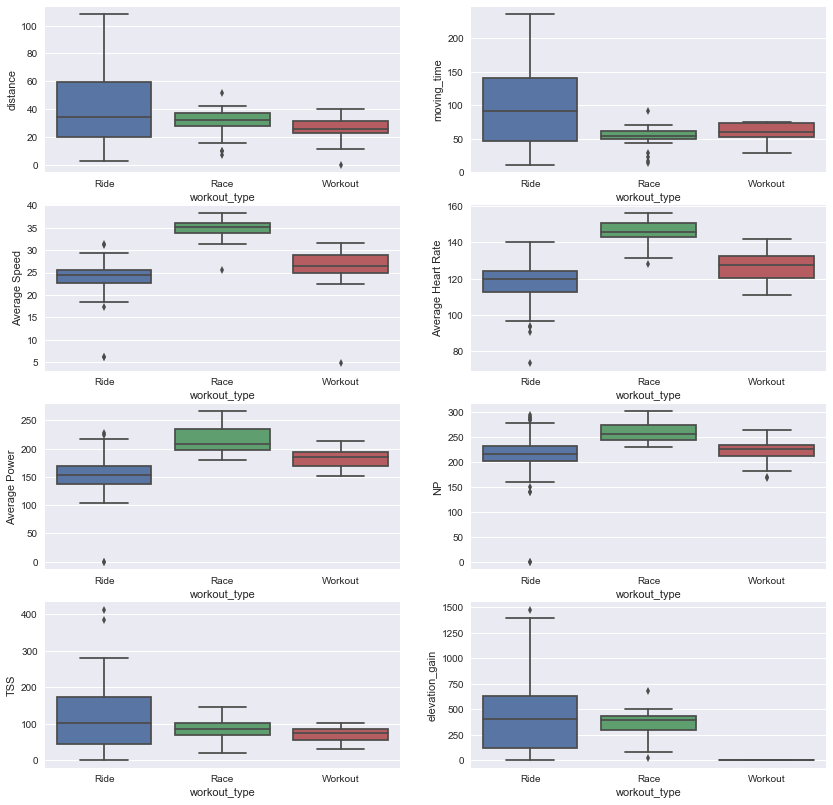

In [26]:
#sns.boxplot(x='distance',data= joined.loc[joined['workout_type']=='workout'])
#sns.boxplot(x='workout_type',y='distance',data= joined)
def boxplotting():
    a2 = ['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain']
    
    f, axes = plt.subplots(4,2, figsize=(14, 14), sharex=False)
    for i in range (0,4):
        for j in range(0,2):
            sns.boxplot(y=a2[(i*2)+(j*1)],x ='workout_type',data=joined ,ax=axes[i,j])
    
boxplotting()

In [27]:
data_ride= joined.loc[joined['workout_type']=='Ride']
data_race= joined.loc[joined['workout_type']=='Race']
data_workout= joined.loc[joined['workout_type']=='Workout']
def distribution(dataset):
    f, axes = plt.subplots(2, 4, figsize=(12, 12), sharex=False,sharey = False)

    a = sns.color_palette("husl", 8)

    a1 = [['distance','moving_time','Average Speed','Average Heart Rate'],['Average Power','NP','TSS','elevation_gain']]
    for i in range (0,2):
        for j in range(0,4):
            sns.distplot(dataset[a1[i][j]],ax=axes[i,j],color=a[(i*4)+j])

            
#Pass any dataset as required: data_ride,data_race,data_workout
#Each dataset has data for the specific caegory as given by name

#distribution(data_ride)

# <font color = 'brown'>Callenges</font>
### <font color = brown>Relationship b/w 'kudos' and other important variables</font>
### <font color = brown> What leads to more kudos? Is there anything to indicate which rides are more popular?</font>

In [28]:
temp2 = joined[['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain','kudos']]
corr_matrix = temp2.corr()
print(corr_matrix["kudos"])

distance              0.754393
moving_time           0.667504
Average Speed         0.372477
Average Heart Rate    0.384264
Average Power         0.232099
NP                    0.395694
TSS                   0.696917
elevation_gain        0.689767
kudos                 1.000000
Name: kudos, dtype: float64


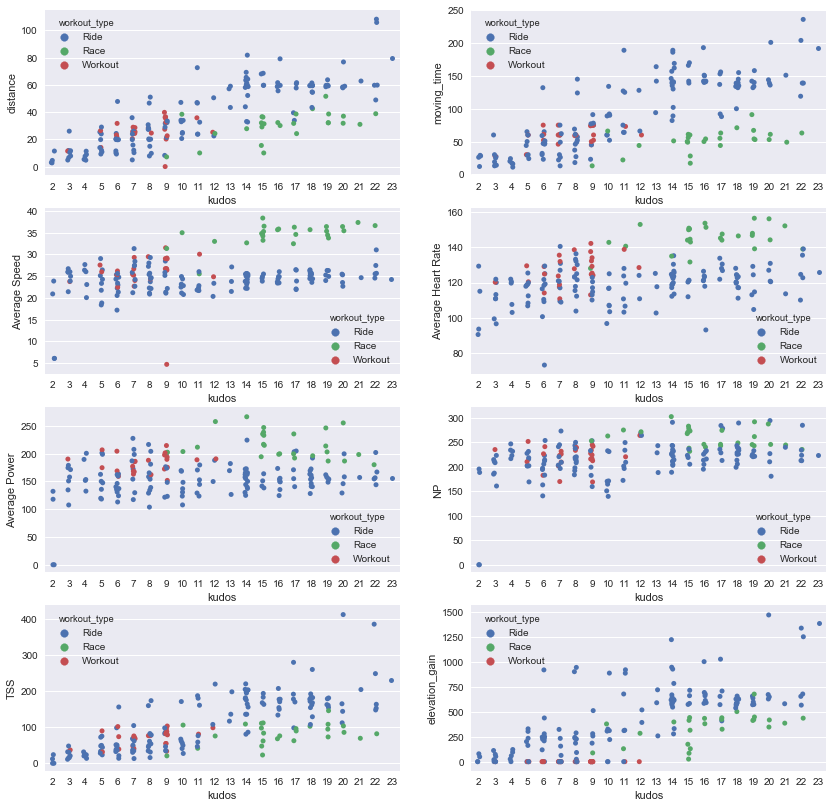

In [29]:
def analyse1():
    a2 = ['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain']
    #a2.remove()
    #x = len(a)
    
    f, axes = plt.subplots(4,2, figsize=(14, 14), sharex=False)
    for i in range (0,4):
        for j in range(0,2):
            #if (i == 3) and (j==1):
                #axes[i,j].set_axis_off()
            #else:
            sns.stripplot(y=a2[(i*2)+(j*1)],x ='kudos',hue='workout_type',data=joined ,ax=axes[i,j])
analyse1()

In [ ]:
# distance, moving_time, 
data_ride1= data_ride[['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain','kudos']]
b1 = data_ride1.corr()['kudos']
data_race1= data_race[['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain','kudos']]
b2 = data_race1.corr()['kudos']
data_workout1= data_workout[['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','elevation_gain','kudos']]
b3 = data_workout1.corr()['kudos']
b1


## <font color = 'brown'> Observations </font>
<font color = 'brown'>Using the plot above and the co-relation funciton for differnet categories:</font>
* <font color = 'brown'>'**Race**' is more popular, since they have the highest kudos even though the individual achieved higher metrics in Ride</font>
* <font color='green'>I am saying this because even if there is higher distance covered in Ride for a high Kudos, the same kudos can be earned in Ride with smaller distance</font>
* <font color='green'>The same is visible for all features that are proportional to Kudos, also mentioned in next point</font> 
* <font color = 'brown'>Higher distance,moving_time, TSS and elevation_gain lead to more Kudos</font>

### <font color = 'brown'>A plot that summarises the number of km ridden each month over the period of the data.</font>
<font color = 'brown'>Overlay this with the sum of the Training Stress Score and the average of the Average Speed to generate an overall summary of activity.</font>

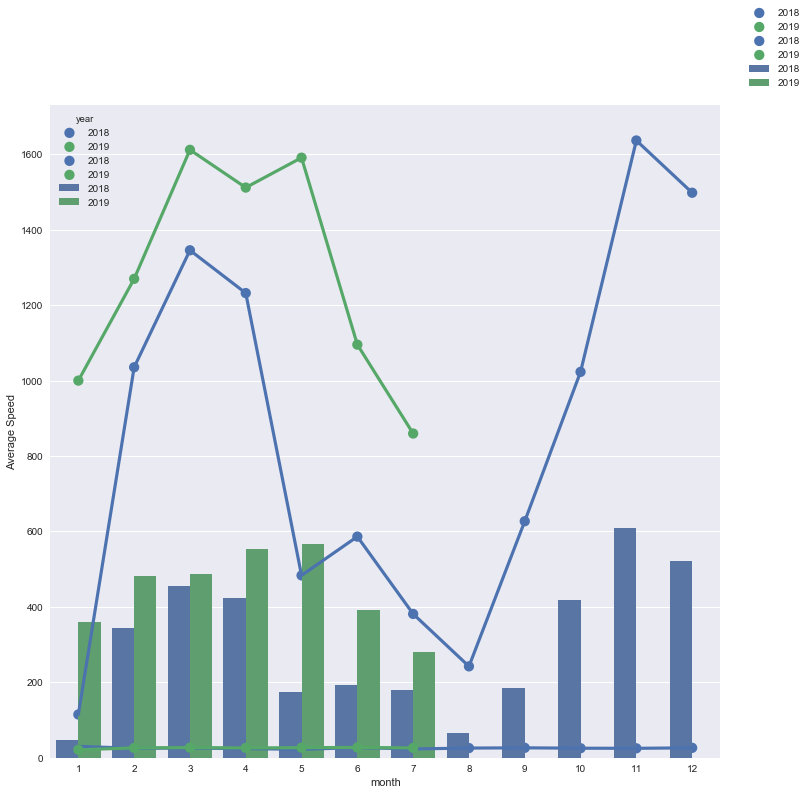

In [33]:
summary = joined[['date','distance','TSS','Average Speed']]
summary['date']= pd.to_datetime(summary['date'])
summary['day'] = summary['date'].dt.day
summary['month'] = summary['date'].dt.month
summary['year'] = summary['date'].dt.year


data1 = summary.groupby(['year','month']).agg({'Average Speed':'mean', 'distance':'sum', 'TSS':'sum'}).reset_index()
fig, ax = plt.subplots()
g = sns.barplot(x ='month',y='distance',data=data1,hue='year',ax=ax)
h = sns.pointplot(x='month',y='TSS',data=data1,hue='year',ax=ax)
j = sns.pointplot(x='month',y='Average Speed',data=data1,hue='year',ax=ax,kind='violin')
fig.legend(loc='best')